###Project : 7

###Project Name: Black Friday Dataset - Predict purchase amount

Student Name: Prathyusha Dokku, SIU856568556

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=82a74c360d6589c46df23eb47a4d71eb5a98363df9c0e03a054c6a115460ce95
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler

In [3]:
spark = SparkSession.builder \
    .appName("BlackFridaySalesPrediction") \
    .getOrCreate()


In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import sys
sys.path.append("/content/drive/MyDrive/LFD-434/Project_Work")

In [6]:
train_data = spark.read.csv("/content/drive/MyDrive/LFD-434/Project_Work/train.csv", header=True, inferSchema=True)

In [7]:
test_data =spark.read.csv( "/content/drive/MyDrive/LFD-434/Project_Work/test.csv", header=True, inferSchema=True)

In [8]:
print("Train Dataset:")
train_data.show(5)

Train Dataset:
+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1000001| P00069042|     F|0-17|        10|            A|                         2|             0|                 3|              NULL|              NULL|    8370|
|1000001| P00248942|     F|0-17|        10|            A|                         2|             0|                 1|                 6|                14|   15200|
|1000001| P00087842|     F|0-17|        10|            A|                         2|             0|                12|              NULL|              NULL

In [9]:
print("Test Dataset:")
test_data.show(5)

Test Dataset:
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+
|User_ID|Product_ID|Gender|  Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+
|1000004| P00128942|     M|46-50|         7|            B|                         2|             1|                 1|                11|              NULL|
|1000009| P00113442|     M|26-35|        17|            C|                         0|             0|                 3|                 5|              NULL|
|1000010| P00288442|     F|36-45|         1|            B|                        4+|             1|                 5|                14|              NULL|
|1000010| P00145342|     F|36-45|     

In [10]:
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [11]:
print("Train Dataset:")
train_data.show(5)

Train Dataset:
+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1000001| P00069042|     F|0-17|        10|            A|                         2|             0|                 3|                 0|                 0|    8370|
|1000001| P00248942|     F|0-17|        10|            A|                         2|             0|                 1|                 6|                14|   15200|
|1000001| P00087842|     F|0-17|        10|            A|                         2|             0|                12|                 0|                 0

In [12]:
print("Test Dataset:")
test_data.show(5)

Test Dataset:
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+
|User_ID|Product_ID|Gender|  Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+
|1000004| P00128942|     M|46-50|         7|            B|                         2|             1|                 1|                11|                 0|
|1000009| P00113442|     M|26-35|        17|            C|                         0|             0|                 3|                 5|                 0|
|1000010| P00288442|     F|36-45|         1|            B|                        4+|             1|                 5|                14|                 0|
|1000010| P00145342|     F|36-45|     

<ipython-input-13-0b8ebe2540a7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.toPandas().corr()


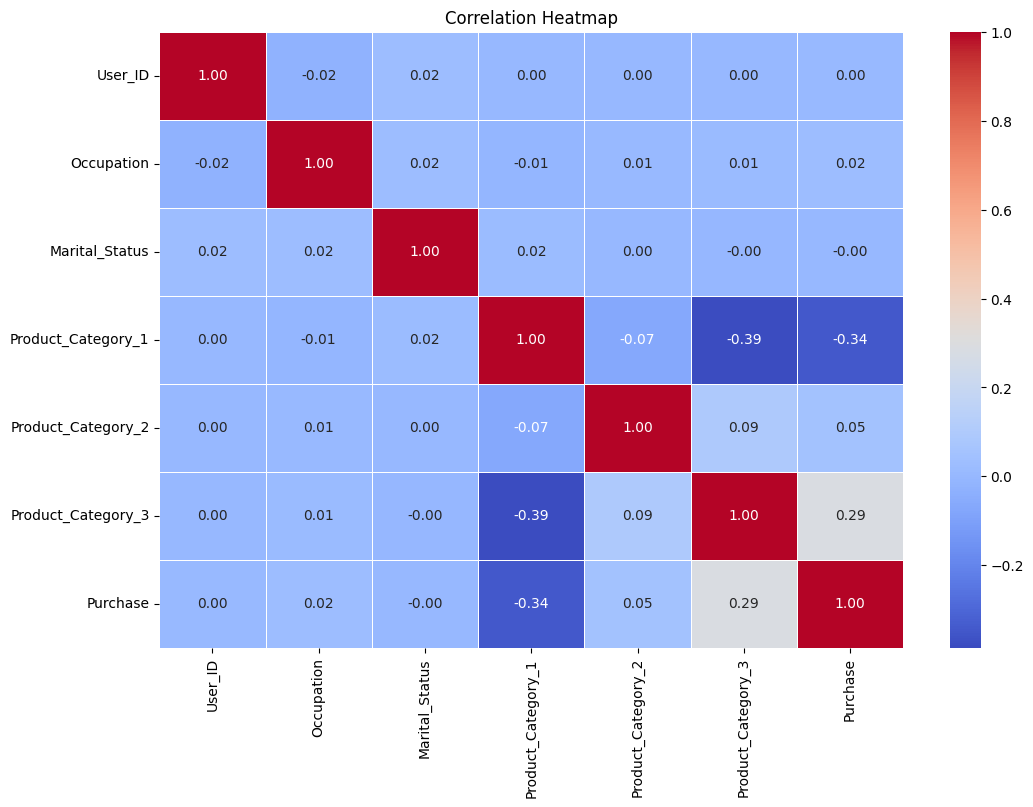

In [13]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = train_data.toPandas().corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [14]:
print("Column names of the train dataset:")
print(train_data.columns)

Column names of the train dataset:
['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [15]:
print("Column names of the test dataset:")
print(test_data.columns)

Column names of the test dataset:
['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


In [16]:
feature_columns = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
target_column = 'Purchase'

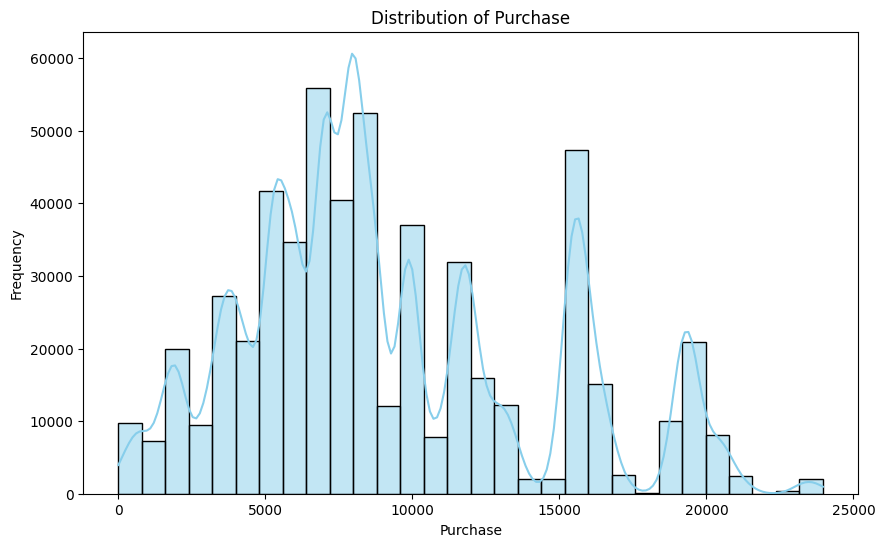

In [17]:
# Visualize the distribution of the target variable (Purchase)
plt.figure(figsize=(10, 6))
sns.histplot(train_data.toPandas()[target_column], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Purchase')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Get the data types of each column in the DataFrame
column_types = {col: dtype for col, dtype in train_data.dtypes}

# Separate categorical and numerical columns
categorical_columns = [col for col, dtype in column_types.items() if dtype == 'string']
numerical_columns = [col for col, dtype in column_types.items() if dtype != 'string']

# Print the categorical and numerical columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
Numerical Columns: ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


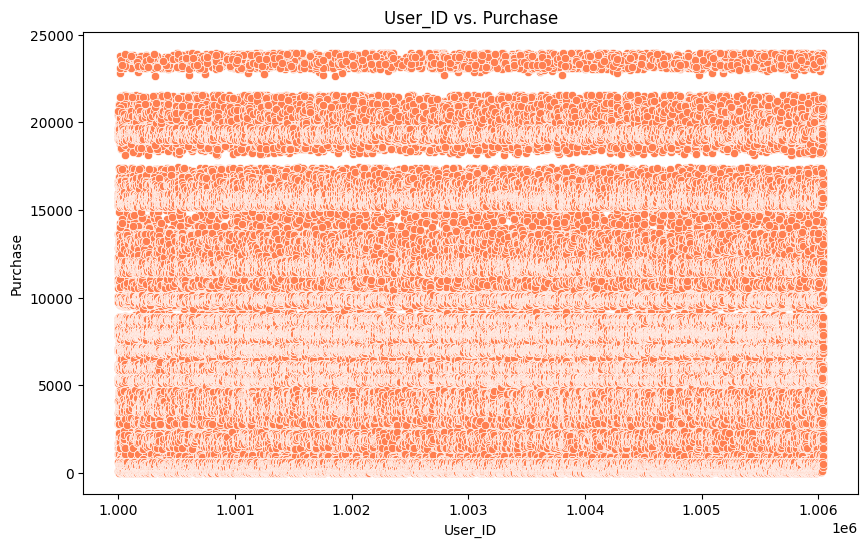

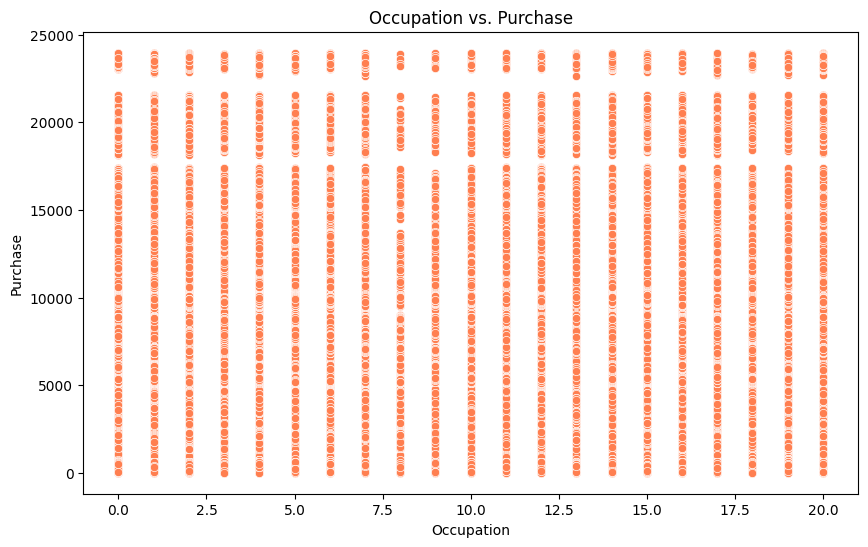

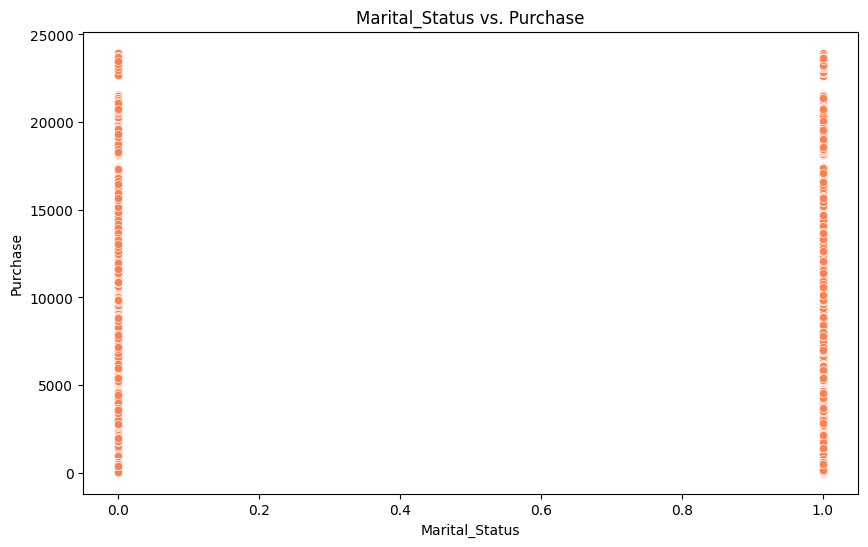

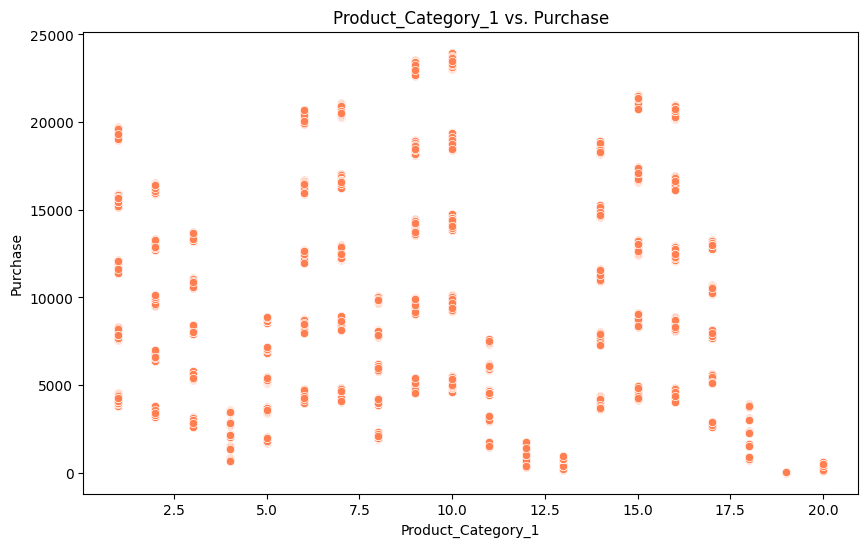

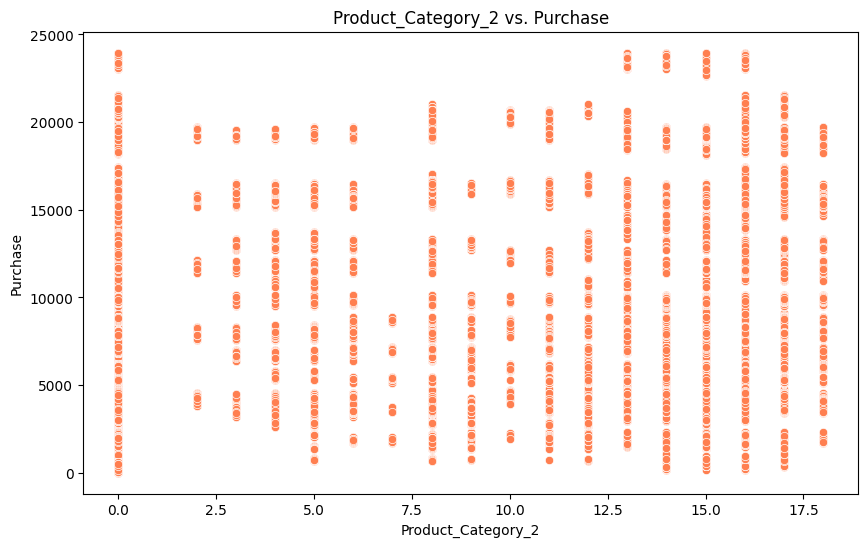

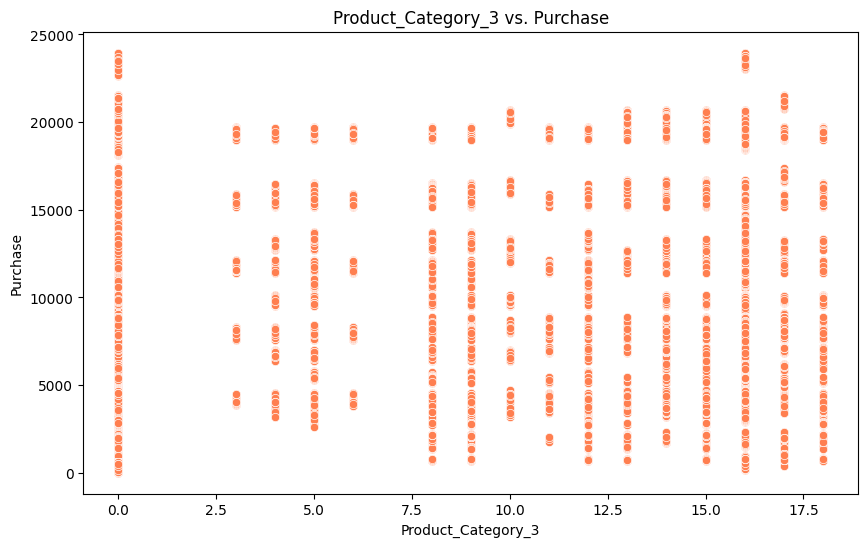

In [19]:
# Visualize the relationship between numerical features and the target variable
numerical_columns = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_data.toPandas(), x=col, y=target_column, color='coral')
    plt.title(f'{col} vs. Purchase')
    plt.xlabel(col)
    plt.ylabel('Purchase')
    plt.show()

<ipython-input-20-37dff26e4e7e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data.toPandas(), x=col, y=target_column, palette='pastel')


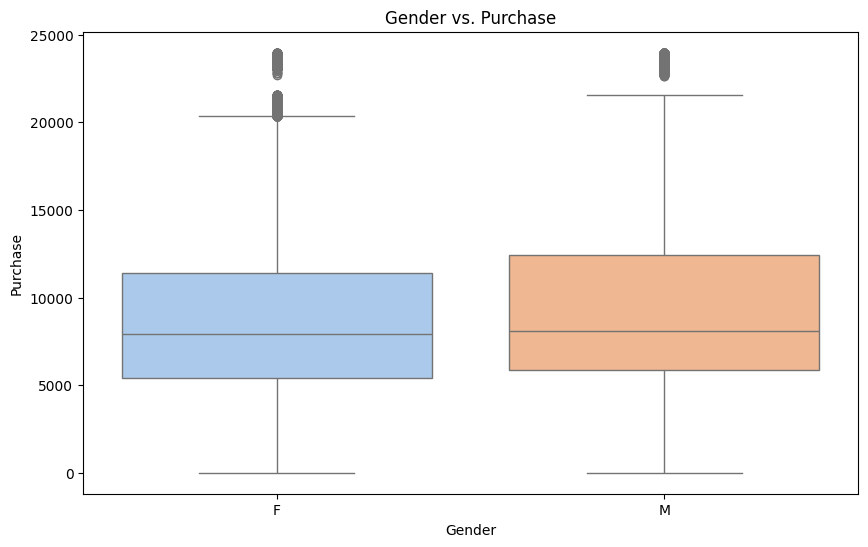

<ipython-input-20-37dff26e4e7e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data.toPandas(), x=col, y=target_column, palette='pastel')


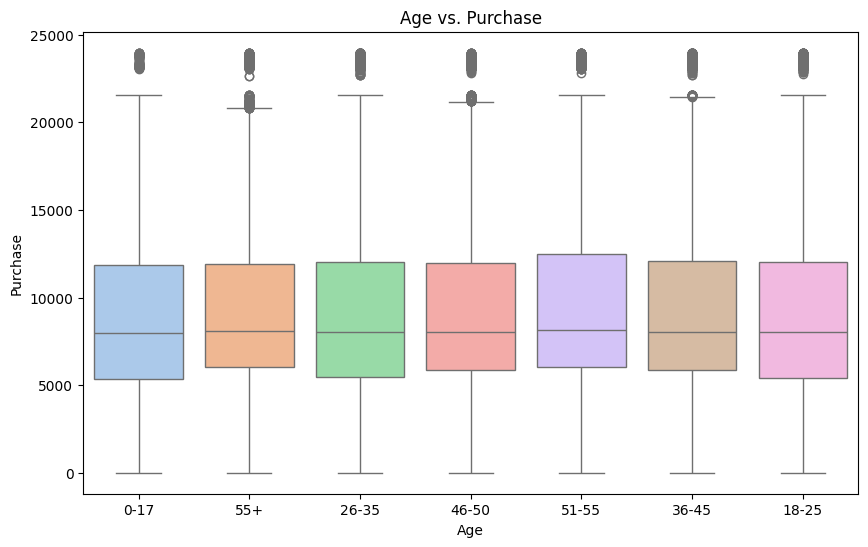

<ipython-input-20-37dff26e4e7e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data.toPandas(), x=col, y=target_column, palette='pastel')


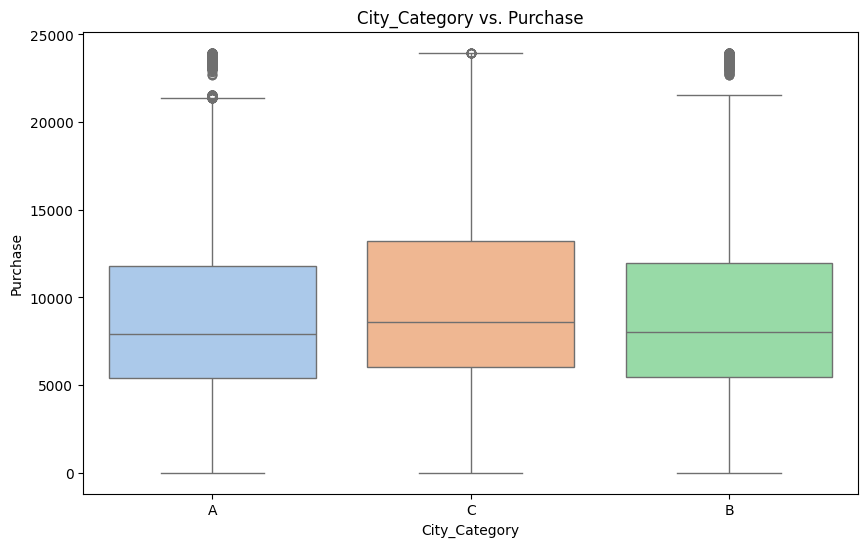

<ipython-input-20-37dff26e4e7e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data.toPandas(), x=col, y=target_column, palette='pastel')


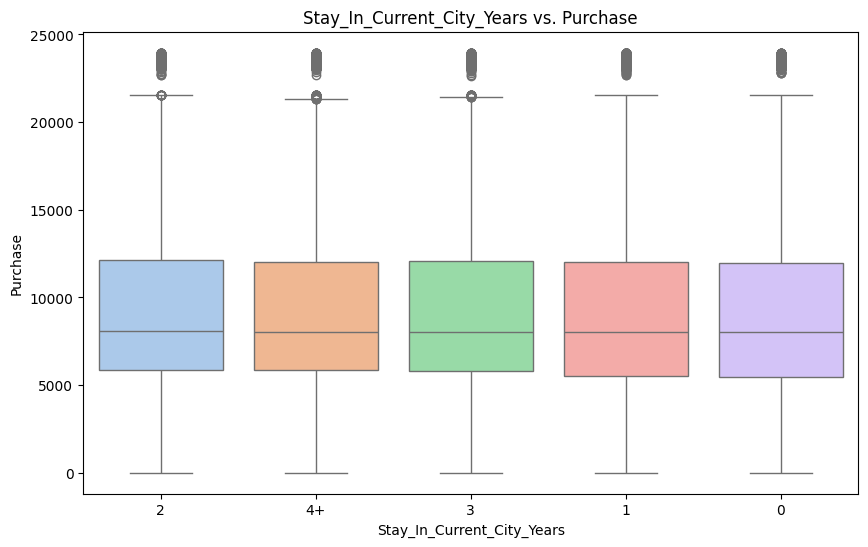

In [20]:
# Visualize the relationship between categorical features and the target variable
categorical_columns = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_data.toPandas(), x=col, y=target_column, palette='pastel')
    plt.title(f'{col} vs. Purchase')
    plt.xlabel(col)
    plt.ylabel('Purchase')
    plt.show()

Applying Linear Regression through Spark

In [21]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Define numeric feature columns
numeric_columns = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

# Assemble features vector
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
train_data_assembled = assembler.transform(train_data)


# Select features column and target column from the DataFrame
train_data_numeric = train_data_assembled.select("features", target_column)

# Create a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol=target_column)

# Train the model
model = lr.fit(train_data_numeric)

# Make predictions on the test data
predictions = model.transform(train_data_numeric)
print(predictions.show(5))


+--------------------+--------+------------------+
|            features|Purchase|        prediction|
+--------------------+--------+------------------+
|[1000001.0,10.0,0...|    8370| 9405.194447572223|
|[1000001.0,10.0,0...|   15200|12224.368201608166|
|[1000001.0,10.0,0...|    1422| 6274.971411672287|
|[1000001.0,10.0,0...|    1057| 6460.952744572786|
|[1000002.0,16.0,0...|    7969| 7742.052364023749|
+--------------------+--------+------------------+
only showing top 5 rows

None


In [22]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import rand

numeric_columns = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
data_assembled = assembler.transform(train_data)

# Split the data into train and validation sets (80% train, 20% validation)
train_data, val_data = data_assembled.randomSplit([0.8, 0.2], seed=42)

# Define the target column
target_column = 'Purchase'

# Create a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol=target_column)

# Train the model on the training data
model = lr.fit(train_data)

# Make predictions on the validation data
predictions = model.transform(val_data)


# Evaluate the model using RMSE
evaluator = RegressionEvaluator(labelCol=C, predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on validation data = {:.2f}".format(rmse))


Root Mean Squared Error (RMSE) on validation data = 4644.00


In [31]:
from sklearn import metrics

print('r2_score:', metrics.r2_score(target_column, predictions))
print('rmse:', np.sqrt(metrics.mean_squared_error(target_column,predictions)))

TypeError: Expected sequence or array-like, got <class 'pyspark.sql.dataframe.DataFrame'>

In [23]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import rand

numeric_columns = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

assembler = VectorAssembler(inputCols=numeric_columns, outputCol="target_column")
data_assembled = assembler.transform(train_data)

# Split the data into train and validation sets (80% train, 20% validation)
train_data, val_data = data_assembled.randomSplit([0.8, 0.2], seed=42)

# Define the target column
target_column = 'Purchase'

# Create a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol=target_column)

# Train the model on the training data
model = lr.fit(train_data)

# Make predictions on the validation data
predictions = model.transform(val_data)


# Evaluate the model using RMSE
evaluator = RegressionEvaluator(labelCol=target_column, predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on validation data = {:.2f}".format(rmse))

Root Mean Squared Error (RMSE) on validation data = 4676.44


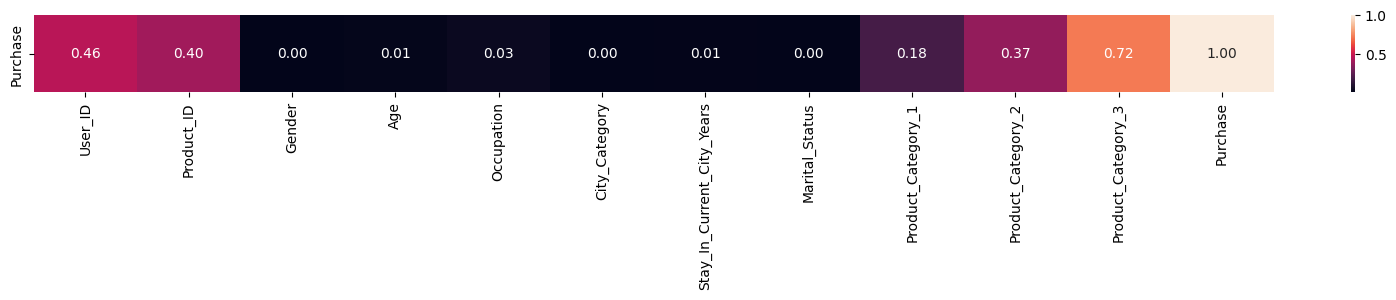

In [24]:
import math
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def conditional_entropy(x, y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy

def theil_u(x, y):
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = -sum([px * np.log(px) for px in p_x])
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

df=pd.read_csv('/content/drive/MyDrive/LFD-434/Project_Work/train.csv')

theilu = pd.DataFrame(index=['Purchase'])
columns = df.columns
for j in range(0, len(columns)):
    u = theil_u(df['Purchase'].tolist(), df[columns[j]].tolist())
    theilu.loc[:, columns[j]] = u

theilu.fillna(value=np.nan, inplace=True)

plt.figure(figsize=(20, 1))
sns.heatmap(theilu, annot=True, fmt='.2f')
plt.show()


In [25]:
zero_not_accepted = ['User_ID','Product_Category_1','Product_Category_2','Product_Category_3']

for col in zero_not_accepted:
    df[col]=df[col].replace(0,np.NaN)
    #print(data[col])
    mean =int(df[col].mean(skipna=True))
    df[col] = df[col].replace(np.NaN,mean)
    #print(data[col])

In [26]:
X = df[['User_ID', 'Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']].values
y = df['Purchase'].values
X=np.array(X)
y=np.array(y)

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def compute_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    n = X.shape[1]
    theta = np.zeros(n)
    for _ in range(iterations):
        y_pred = np.dot(X, theta)
        error = y_pred - y
        gradient = (1/m) * np.dot(X.T, error)
        theta -= learning_rate * gradient
    return theta







In [28]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to X for the bias term
train_X = np.column_stack((np.ones(len(train_X)), train_X))
test_X = np.column_stack((np.ones(len(test_X)), test_X))

# Perform gradient descent
theta = gradient_descent(train_X, train_y)

predictions_gradient_descent = np.dot(test_X, theta)

lr_model = LinearRegression()
lr_model.fit(train_X[:, 1:], train_y)
predictions_sklearn = lr_model.predict(test_X[:, 1:])

# Calculate RMSE for gradient descent
rmse_gradient_descent = compute_rmse(test_y, predictions_gradient_descent)
print("RMSE using Gradient Descent:", rmse_gradient_descent)

# Calculate RMSE for linear regression from scikit-learn
rmse_sklearn = np.sqrt(mean_squared_error(test_y, predictions_sklearn))
print("RMSE using scikit-learn Linear Regression:", rmse_sklearn)

TypeError: can't multiply sequence by non-int of type 'float'